In [1]:
# First, import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [2]:
import pandas as pd
import numpy as np
import statistics

# mencari directory saat ini
import os
os.getcwd()
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')
# Path data
cur_path = "D:/ITS/Tugas Akhir/data/Endaq CSV/"


Text(0, 0.5, 'Amplitude [m/s^2]')

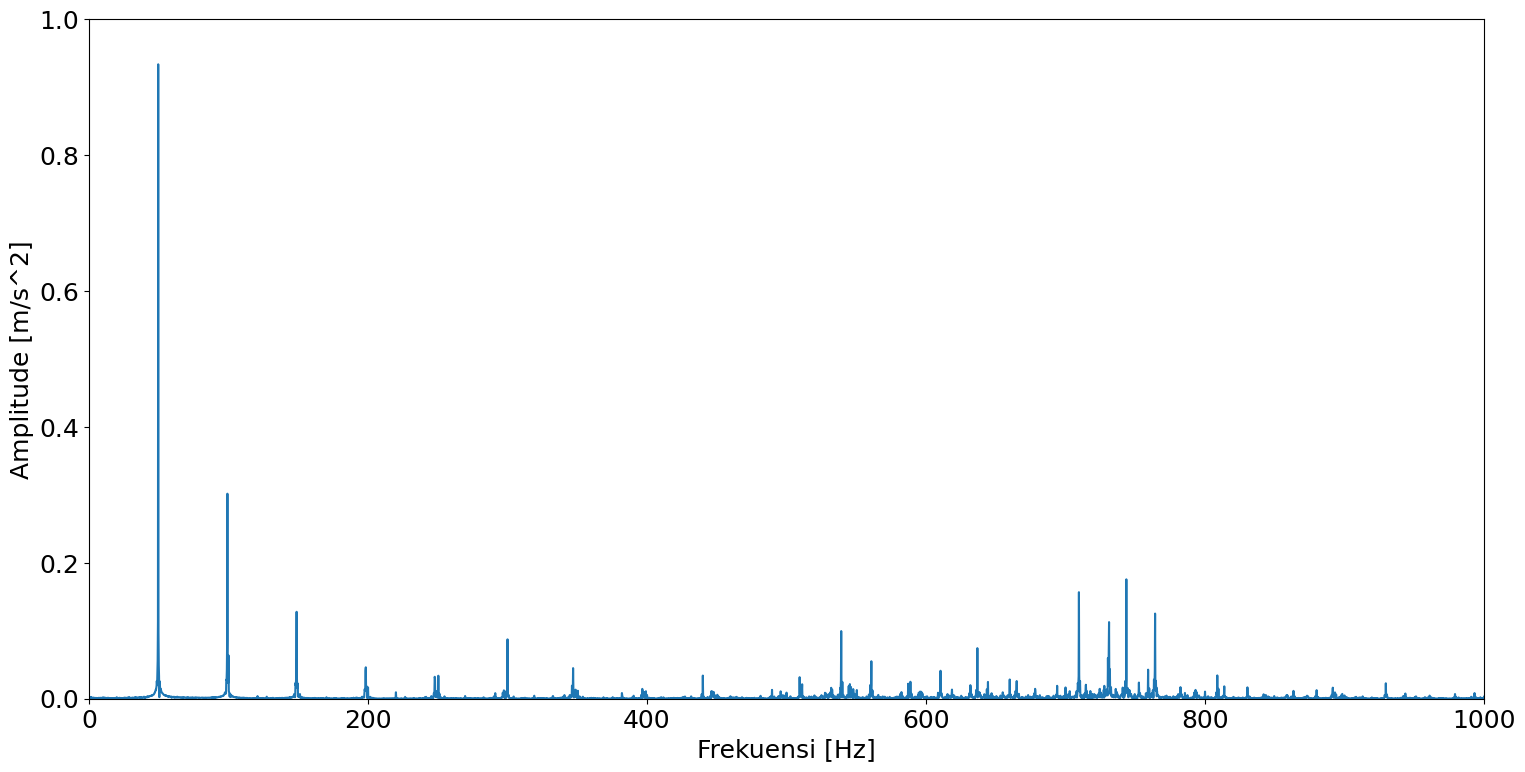

In [18]:
from numpy.fft import rfft, rfftfreq
# Generate signal

#x = pd.read_csv('D:/ITS/Tugas Akhir/data/Endaq test/bearing/2.csv')
x = pd.read_csv('D:/ITS/Tugas Akhir/data/Endaq test/revisi/brg_misg_004_Ch08_100g_PE_Acceleration.csv')
x.drop(x.columns[[0,1,3]], axis=1, inplace=True)
#x = pd.read_csv('D:/ITS/Tugas Akhir/data/Mafaulda/unbalance/unbalance_30g (14).csv')
#x.drop(x.columns[[0,2,3,4,5,6,7]], axis=1, inplace=True)
x=x.values.flatten() #to convert DataFrame to 1D array
x=x*9.81

# Calculate Fast Fourier Transform
x = np.asarray(x)
n=len(x)
t = 5
fs=n/t # Example sampling frequency in Hz
dt=1/fs #time increment in each data
xfftx = rfft(x)*dt
xfftx = abs(xfftx)
xfftx = (xfftx - np.min(xfftx)) / (22 - np.min(xfftx))
fAxis = rfftfreq(n,dt) # in Hz

plt.rcParams.update({'font.size' : 18})

plt.figure(figsize = (18,9))
#plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':100, 'font.size': 22})
plt.subplot(1,1,1)
plt.plot(fAxis,xfftx)
plt.xlim(0,1000)
plt.ylim(0,1)
plt.xlabel('Frekuensi [Hz]')
plt.ylabel('Amplitude [m/s^2]')
#plt.title('Sebelum ')
#plt.title('Normal x-axis')

Text(0.5, 1.0, 'Normal y-axis')

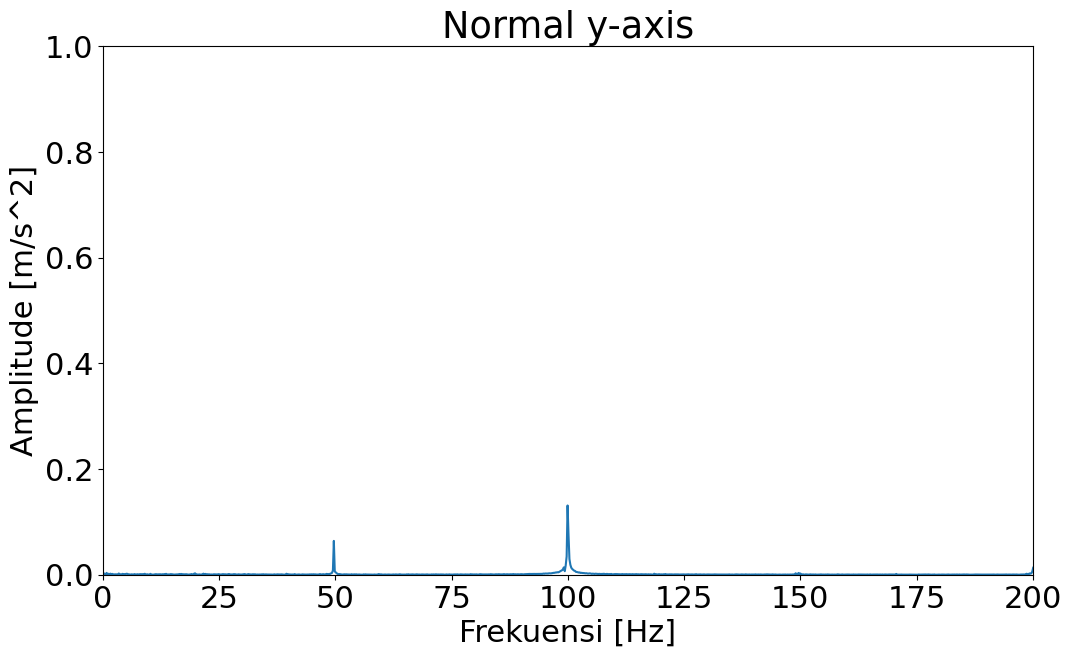

In [127]:
from numpy.fft import rfft, rfftfreq
# Generate signal

y = pd.read_csv('D:/ITS/Tugas Akhir/data/Endaq test/normal/3.csv')
y.drop(y.columns[[0,1,3]], axis=1, inplace=True)
y=y.values.flatten() #to convert DataFrame to 1D array
y=y*9.81

# Calculate Fast Fourier Transform
y = np.asarray(y)
fs=20000 # Example sampling frequency in Hz
n=len(y)
dt=1/fs #time increment in each data
xffty = rfft(y)*dt
xffty = abs(xffty)
xffty = (xffty - np.min(xffty)) / (14 - np.min(xffty))
fAxis = rfftfreq(n,dt) # in Hz

plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':100, 'font.size': 22})
plt.plot(fAxis,xffty)
plt.xlim(0,200)
plt.ylim(0,1)
plt.xlabel('Frekuensi [Hz]')
plt.ylabel('Amplitude [m/s^2]')
plt.title('Normal y-axis')

Text(0.5, 1.0, 'Normal z-axis')

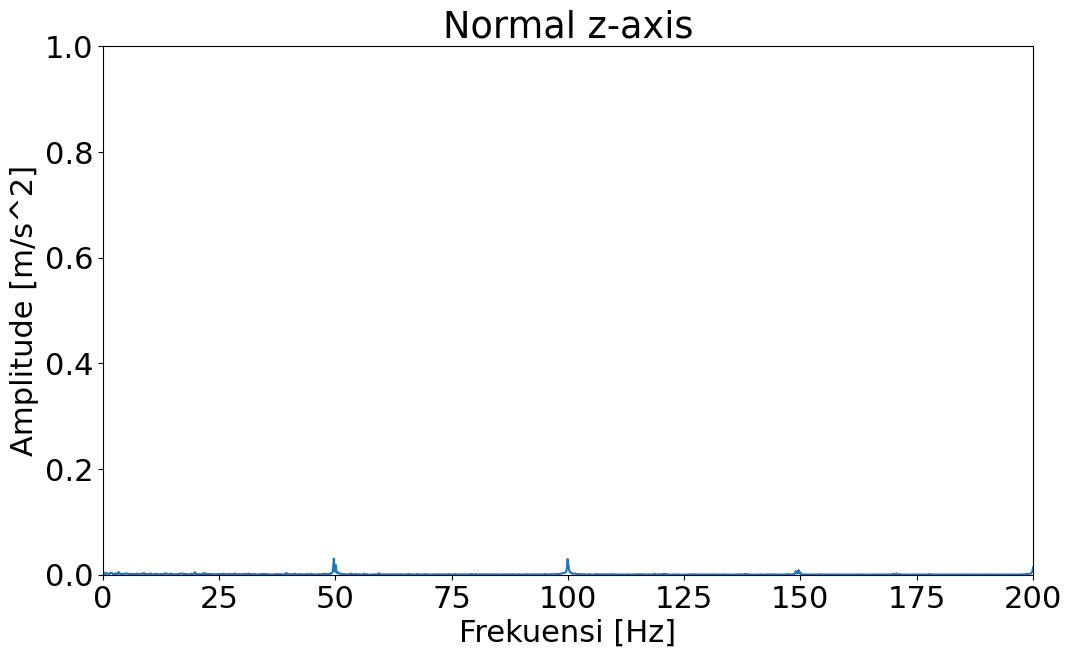

In [128]:
from numpy.fft import rfft, rfftfreq
# Generate signal

z = pd.read_csv('D:/ITS/Tugas Akhir/data/Endaq test/normal/3.csv')
z.drop(z.columns[[0,1,2]], axis=1, inplace=True)
z=z.values.flatten() #to convert DataFrame to 1D array
z=z*9.81

# Calculate Fast Fourier Transform
z = np.asarray(z)
fs=20000 # Example sampling frequency in Hz
n=len(z)
dt=1/fs #time increment in each data
xfftz = rfft(z)*dt
xfftz = abs(xfftz)
xfftz = (xfftz - np.min(xfftz)) / (14 - np.min(xfftz))
fAxis = rfftfreq(n,dt) # in Hz

plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':100, 'font.size': 22})
plt.plot(fAxis,xfftz)
plt.xlim(0,200)
plt.ylim(0,1)
plt.xlabel('Frekuensi [Hz]')
plt.ylabel('Amplitude [m/s^2]')
plt.title('Normal z-axis')

Text(0.5, 1.0, 'Spektrum kondisi Unbalance')

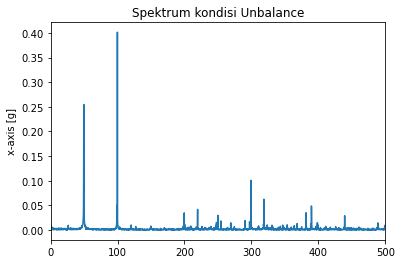

In [102]:
from sklearn import preprocessing
#data = (xfftx - np.min(xfftx)) / (np.max(xfftx) - np.min(xfftx))

plt.plot(fAxis,xfftx)
plt.xlim(0,500)
#plt.ylim(0,1.2)
plt.ylabel('x-axis [g]')
plt.title('Spektrum kondisi Unbalance')

In [129]:
xfftx.shape

(49936,)

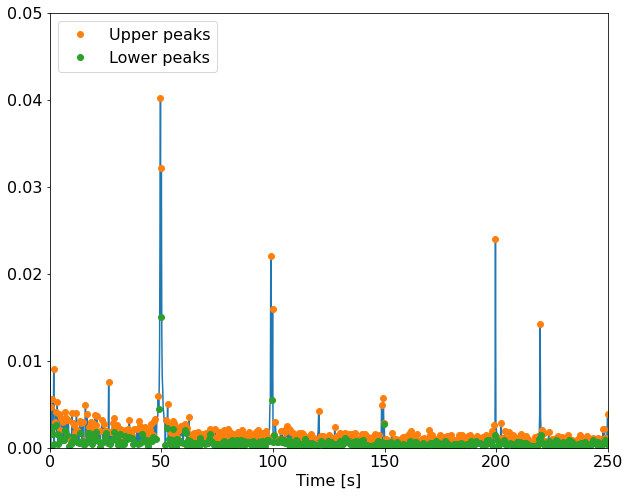

In [5]:
upper_peaks, _ = find_peaks(xfft)
lower_peaks, _ = find_peaks(-xfft)

plt.rcParams.update({'font.size' : 16})
plt.figure(figsize = (10,8))
plt.plot(fAxis,xfft)
plt.plot(upper_peaks*fs/n,xfft[upper_peaks],'o',label = 'Upper peaks')
plt.plot(lower_peaks*fs/n,xfft[lower_peaks],'o',label = 'Lower peaks')
plt.xlim(0,250)
plt.ylim(0,0.05)
plt.xlabel('Time [s]')
plt.legend(loc = 'upper left')

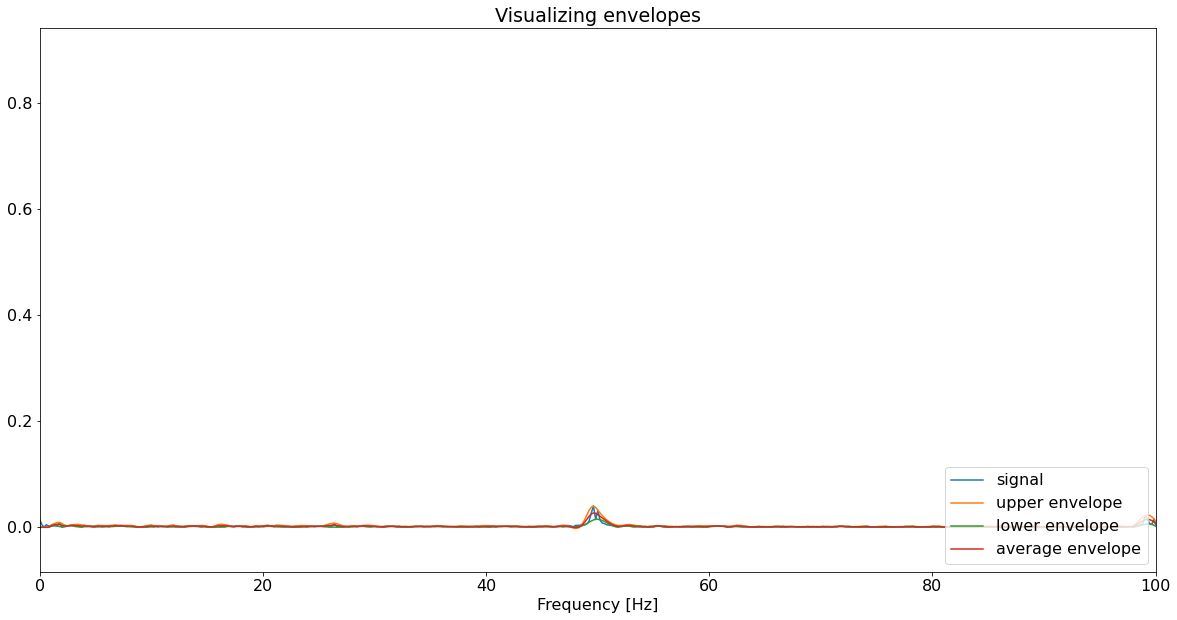

In [6]:
f1 = interp1d(upper_peaks*fs/n,xfft[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks*fs/n,xfft[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(fAxis)
y2 = f2(fAxis)

# Zero padding to avoid singularities at the edges of the signal
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0
avg_envelope = (y1 + y2) / 2


plt.figure(figsize = (20,10))
plt.plot(fAxis,xfft, label = 'signal')
plt.plot(fAxis,y1, label = 'upper envelope')
plt.plot(fAxis,y2, label = 'lower envelope')
plt.plot(fAxis,avg_envelope, label = 'average envelope')
plt.title('Visualizing envelopes')
plt.xlim(0,100)
#plt.ylim(0,0.05)
plt.xlabel('Frequency [Hz]')
plt.legend(loc = 'lower right')

Text(0.5, 1.0, 'Signal residual in the first iteration')

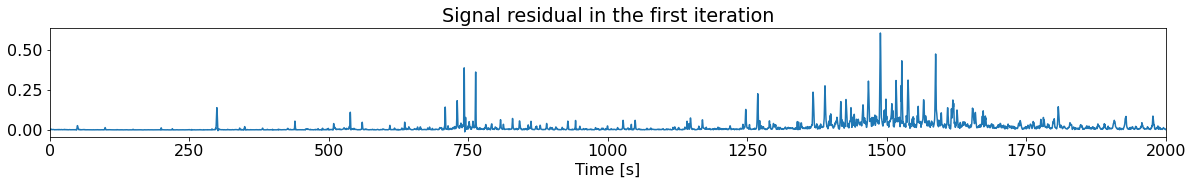

In [7]:
res1 = avg_envelope

# Calculate Fast Fourier Transform
xfft1 = (res1)

plt.figure(figsize = (20,2))
#plt.subplot(1,2,1)
plt.plot(fAxis,xfft1)
plt.xlabel('Time [s]')
plt.xlim(0,2000)
#plt.ylim(0,1)
plt.title('Signal residual in the first iteration')

Text(0.5, 1.0, 'Signal residual in the second iteration')

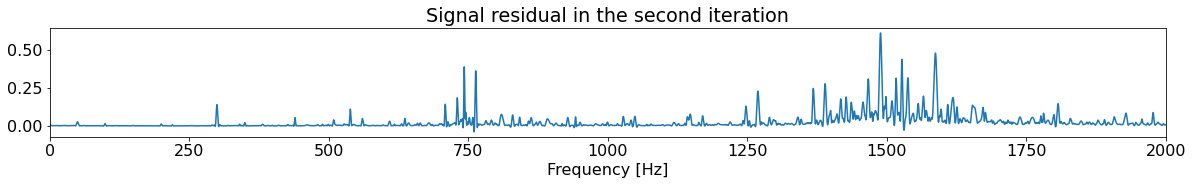

In [8]:
upper_peaks, _ = find_peaks(res1)
lower_peaks, _ = find_peaks(res1)

f1 = interp1d(upper_peaks*fs/n,res1[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks*fs/n,res1[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(fAxis)
y2 = f2(fAxis)
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0

avg_envelope = (y1 + y2) / 2

res2 = avg_envelope
imf2 = res1 - avg_envelope
xfft2 = (res2)

plt.figure(figsize = (20,2))
plt.plot(fAxis,xfft2)
plt.xlim(0,2000)
#plt.ylim(0,1)
plt.xlabel('Frequency [Hz]')
plt.title('Signal residual in the second iteration')

Text(0.5, 1.0, 'Signal residual in the third iteration')

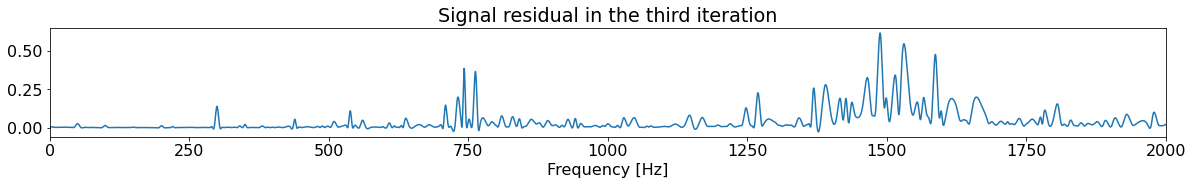

In [9]:
upper_peaks, _ = find_peaks(res2)
lower_peaks, _ = find_peaks(res2)

f1 = interp1d(upper_peaks*fs/n,res2[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks*fs/n,res2[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(fAxis)
y2 = f2(fAxis)
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0

avg_envelope = (y1 + y2) / 2

res3 = avg_envelope
imf3 = res2 - avg_envelope
xfft3 = (res3)

plt.figure(figsize = (20,2))
plt.plot(fAxis,xfft3)
plt.xlim(0,2000)
#plt.ylim(0,1)
plt.xlabel('Frequency [Hz]')
plt.title('Signal residual in the third iteration')

Text(0.5, 1.0, 'Signal residual in the fourth iteration')

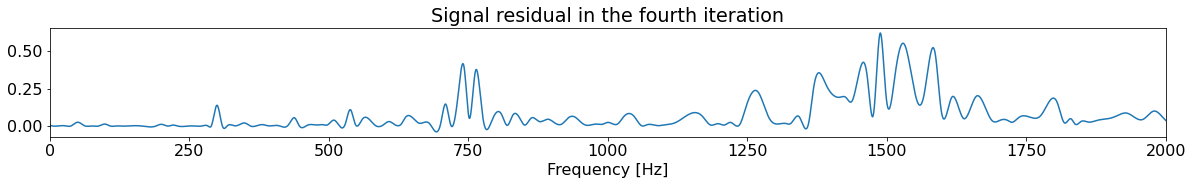

In [10]:
upper_peaks, _ = find_peaks(res3)
lower_peaks, _ = find_peaks(res3)

f1 = interp1d(upper_peaks*fs/n,res3[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks*fs/n,res3[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(fAxis)
y2 = f2(fAxis)
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0

avg_envelope = (y1 + y2) / 2

res4 = avg_envelope
imf4 = res3 - avg_envelope
xfft4 = (res4)

plt.figure(figsize = (20,2))
plt.plot(fAxis,xfft4)
plt.xlim(0,2000)
#plt.ylim(0,1)
plt.xlabel('Frequency [Hz]')
plt.title('Signal residual in the fourth iteration')

Text(0.5, 1.0, 'Signal residual in the fifth iteration')

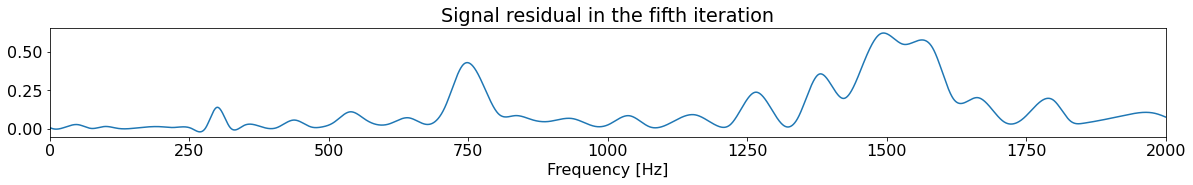

In [11]:
upper_peaks, _ = find_peaks(res4)
lower_peaks, _ = find_peaks(res4)

f1 = interp1d(upper_peaks*fs/n,res4[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks*fs/n,res4[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(fAxis)
y2 = f2(fAxis)
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0

avg_envelope = (y1 + y2) / 2

res5 = avg_envelope
imf5 = res4 - avg_envelope
xfft5 = (res5)

plt.figure(figsize = (20,2))
plt.plot(fAxis,xfft5)
plt.xlim(0,2000)
#plt.ylim(0,1)
plt.xlabel('Frequency [Hz]')
plt.title('Signal residual in the fifth iteration')

(0.0, 2000.0)

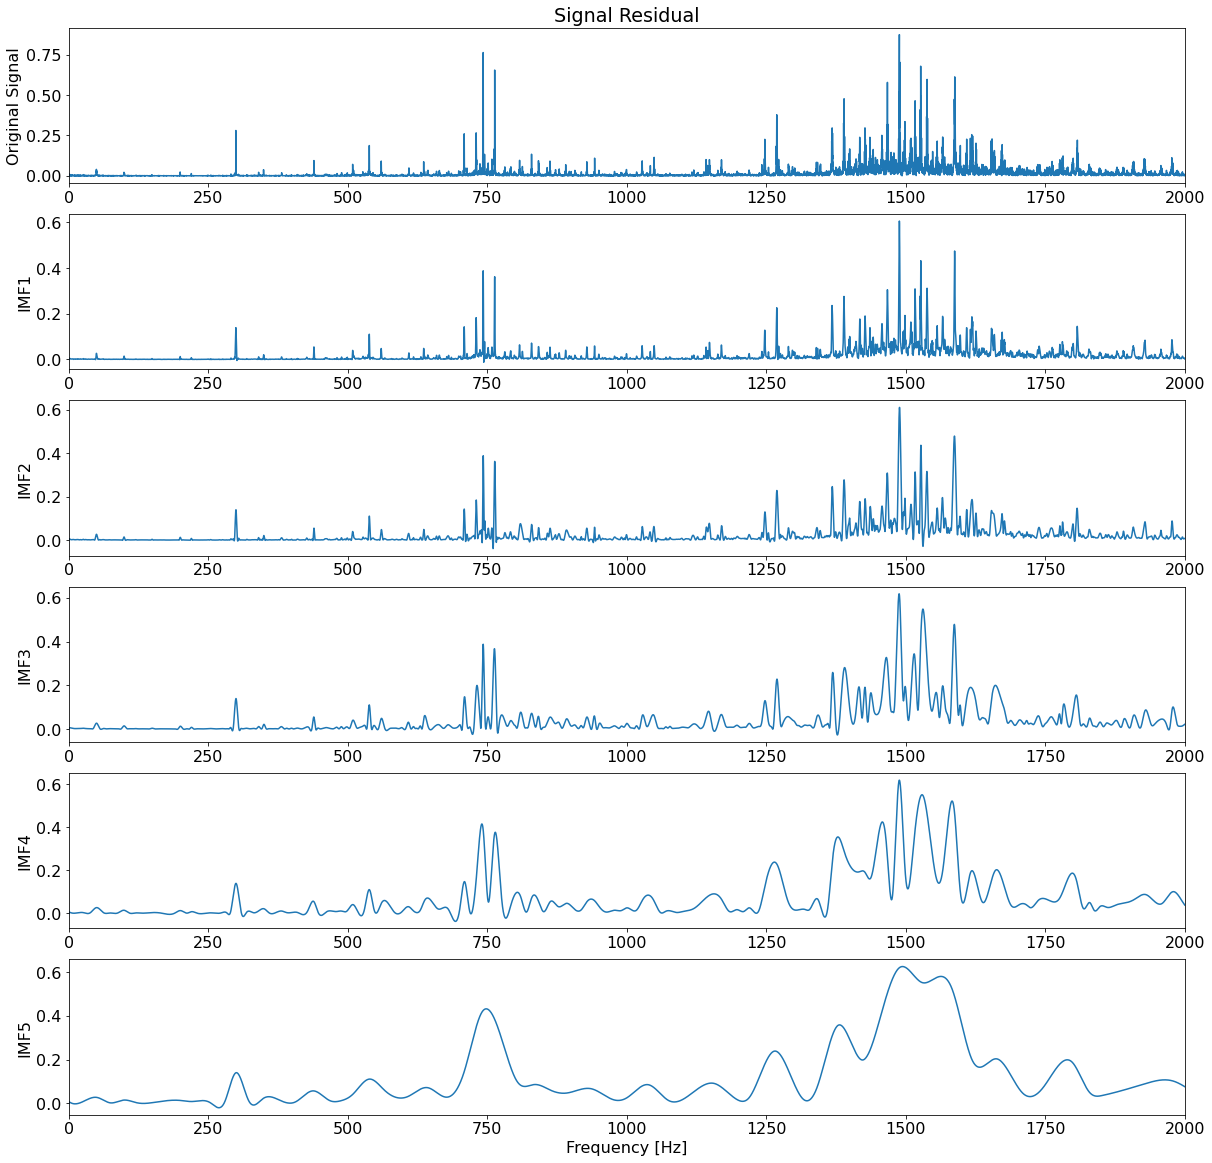

In [12]:
plt.figure(figsize = (20,20))

plt.subplot(6,1,1)
plt.plot(fAxis,xfft)
plt.title('Signal Residual')
plt.ylabel('Original Signal')
plt.xlim(0,2000)

plt.subplot(6,1,2)
plt.plot(fAxis,xfft1)
plt.ylabel('IMF1')
plt.xlim(0,2000)

plt.subplot(6,1,3)
plt.plot(fAxis,xfft2)
plt.ylabel('IMF2')
plt.xlim(0,2000)

plt.subplot(6,1,4)
plt.plot(fAxis,xfft3)
plt.ylabel('IMF3')
plt.xlim(0,2000)

plt.subplot(6,1,5)
plt.plot(fAxis,xfft4)
plt.ylabel('IMF4')
plt.xlim(0,2000)

plt.subplot(6,1,6)
plt.plot(fAxis,xfft5)
plt.ylabel('IMF5')
plt.xlabel('Frequency [Hz]')
plt.xlim(0,2000)
#plt.ylim(0,0.75)

In [13]:
np.std(xfft5)

0.08252716938446804